# 드론 데이터 분석을 위한 시계열 데이터 다루기

In [1]:
import numpy as np
import pandas as pd
pd.__version__

'1.4.2'

## 시계열 처리

In [2]:
idx = pd.DatetimeIndex(['2022-01-01', '2023-01-01', '2023-02-01', '2023-02-02', '2023-03-01'])
s = pd.Series([0, 1, 2, 3, 4], index=idx)
s

2022-01-01    0
2023-01-01    1
2023-02-01    2
2023-02-02    3
2023-03-01    4
dtype: int64

In [3]:
type(idx)

pandas.core.indexes.datetimes.DatetimeIndex

In [4]:
s.dtypes

dtype('int64')

In [5]:
idx

DatetimeIndex(['2022-01-01', '2023-01-01', '2023-02-01', '2023-02-02',
               '2023-03-01'],
              dtype='datetime64[ns]', freq=None)

In [6]:
s['2023-01-01':]

2023-01-01    1
2023-02-01    2
2023-02-02    3
2023-03-01    4
dtype: int64

In [7]:
s[:'2023-01-01']

2022-01-01    0
2023-01-01    1
dtype: int64

In [8]:
s['2022']

2022-01-01    0
dtype: int64

In [9]:
s['2023']

2023-01-01    1
2023-02-01    2
2023-02-02    3
2023-03-01    4
dtype: int64

#### 시계열 데이터 구조


|   타임스탬프(timestamp)  |     기간(time period)    |      시간 델타 또는 지속 기간     |
|:-------------------------|:-------------------------|:----------------------------------|
|Pandas Timestamp 타입 제공|Pandas Period 타입 제공   |Pandas의 Timedelta 타입 제공       |
|파이썬 datetime 대체 타입 |                          |파이썬 datetime.timedelta 대체 타입|
|numpy.datetime64 타입 기반|numpy.datetime64 타입 기반|numpy.timedelta64 타입 기반        |
|DatetimeIndex 인덱스 구조|PeriodIndex 인덱스 구조    |TimedeltaIndex 인덱스 구조         |

In [10]:
from datetime import datetime
dates = pd.to_datetime(['12-12-2022', datetime(2023, 1, 1), '2nd of Feb, 2023', '2023-Mar-4', '2023-Jul-1'])
dates

DatetimeIndex(['2022-12-12', '2023-01-01', '2023-02-02', '2023-03-04',
               '2023-07-01'],
              dtype='datetime64[ns]', freq=None)

In [11]:
dates.to_period('D')

PeriodIndex(['2022-12-12', '2023-01-01', '2023-02-02', '2023-03-04',
             '2023-07-01'],
            dtype='period[D]')

In [12]:
dates.to_period('M')

PeriodIndex(['2022-12', '2023-01', '2023-02', '2023-03', '2023-07'], dtype='period[M]')

In [13]:
dates.to_period('Y')

PeriodIndex(['2022', '2023', '2023', '2023', '2023'], dtype='period[A-DEC]')

In [14]:
dates - dates[0]

TimedeltaIndex(['0 days', '20 days', '52 days', '82 days', '201 days'], dtype='timedelta64[ns]', freq=None)

In [15]:
pd.date_range('2023-01-01', '2023-07-01')

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-06-22', '2023-06-23', '2023-06-24', '2023-06-25',
               '2023-06-26', '2023-06-27', '2023-06-28', '2023-06-29',
               '2023-06-30', '2023-07-01'],
              dtype='datetime64[ns]', length=182, freq='D')

In [16]:
pd.date_range('2023-01-01', periods=7)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07'],
              dtype='datetime64[ns]', freq='D')

In [17]:
pd.date_range('2023-01-01', periods=7, freq='M')

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31'],
              dtype='datetime64[ns]', freq='M')

In [18]:
pd.date_range('2023-01-01', periods=7, freq='H')

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [19]:
idx = pd.to_datetime(['2023-01-01 12:00:00', '2023-01-02 00:00:00'] + [None])
idx

DatetimeIndex(['2023-01-01 12:00:00', '2023-01-02 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [20]:
idx[2]

NaT

In [21]:
pd.isnull(idx)

array([False, False,  True])

### 시계열 기본

In [22]:
datetime(2023, 1, 1)

datetime.datetime(2023, 1, 1, 0, 0)

In [23]:
dates = [datetime(2023, 1, 1), datetime(2023, 1, 2), datetime(2023, 1, 4), datetime(2023, 1, 7),
datetime(2023, 1, 10), datetime(2023, 1, 11), datetime(2023, 1, 15)]
dates

[datetime.datetime(2023, 1, 1, 0, 0),
 datetime.datetime(2023, 1, 2, 0, 0),
 datetime.datetime(2023, 1, 4, 0, 0),
 datetime.datetime(2023, 1, 7, 0, 0),
 datetime.datetime(2023, 1, 10, 0, 0),
 datetime.datetime(2023, 1, 11, 0, 0),
 datetime.datetime(2023, 1, 15, 0, 0)]

In [24]:
ts = pd.Series(np.random.randn(7), index=dates)
ts

2023-01-01   -0.033058
2023-01-02   -0.492636
2023-01-04    0.146317
2023-01-07   -1.337582
2023-01-10   -0.460707
2023-01-11    0.711833
2023-01-15    0.462018
dtype: float64

In [25]:
ts.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-04', '2023-01-07',
               '2023-01-10', '2023-01-11', '2023-01-15'],
              dtype='datetime64[ns]', freq=None)

In [26]:
ts.index[0]

Timestamp('2023-01-01 00:00:00')

In [27]:
ts[ts.index[2]]

0.1463173755558947

In [28]:
ts['20230104']

0.1463173755558947

In [29]:
ts['1/4/2023']

0.1463173755558947

In [30]:
ts = pd.Series(np.random.randn(1000),
index=pd.date_range('2022-10-01', periods=1000))
ts

2022-10-01    1.235781
2022-10-02   -0.063476
2022-10-03    0.055667
2022-10-04   -0.513071
2022-10-05   -0.497422
                ...   
2025-06-22   -0.023756
2025-06-23    0.034140
2025-06-24   -1.404380
2025-06-25   -0.890469
2025-06-26    2.579984
Freq: D, Length: 1000, dtype: float64

In [31]:
ts['2023']

2023-01-01    1.168473
2023-01-02   -1.017602
2023-01-03   -0.219264
2023-01-04    0.809273
2023-01-05    1.166334
                ...   
2023-12-27    0.489362
2023-12-28   -0.652573
2023-12-29   -1.918919
2023-12-30   -0.483366
2023-12-31   -0.067578
Freq: D, Length: 365, dtype: float64

In [32]:
ts['2023-06']

2023-06-01    0.385344
2023-06-02   -0.233756
2023-06-03   -0.142593
2023-06-04    0.010374
2023-06-05   -0.465318
2023-06-06    1.306600
2023-06-07   -0.359441
2023-06-08    0.721426
2023-06-09   -1.555869
2023-06-10   -0.302223
2023-06-11    0.265127
2023-06-12    0.981697
2023-06-13    1.267642
2023-06-14    1.683517
2023-06-15   -0.293817
2023-06-16    0.227047
2023-06-17   -0.256481
2023-06-18    1.202204
2023-06-19   -0.522048
2023-06-20   -0.243220
2023-06-21    1.280151
2023-06-22    0.066785
2023-06-23   -0.421794
2023-06-24    0.492370
2023-06-25   -0.627791
2023-06-26   -1.405915
2023-06-27   -1.156034
2023-06-28   -0.553569
2023-06-29    1.451845
2023-06-30   -0.538124
Freq: D, dtype: float64

In [33]:
ts[datetime(2023, 6, 20):]

2023-06-20   -0.243220
2023-06-21    1.280151
2023-06-22    0.066785
2023-06-23   -0.421794
2023-06-24    0.492370
                ...   
2025-06-22   -0.023756
2025-06-23    0.034140
2025-06-24   -1.404380
2025-06-25   -0.890469
2025-06-26    2.579984
Freq: D, Length: 738, dtype: float64

In [34]:
ts['2023-06-10':'2023-06-20']

2023-06-10   -0.302223
2023-06-11    0.265127
2023-06-12    0.981697
2023-06-13    1.267642
2023-06-14    1.683517
2023-06-15   -0.293817
2023-06-16    0.227047
2023-06-17   -0.256481
2023-06-18    1.202204
2023-06-19   -0.522048
2023-06-20   -0.243220
Freq: D, dtype: float64

2013년 1년 동안의 날씨 데이터를 활용한 시계열 정보 다루기
1) 시간데이터를 index로 다루기 1

In [35]:
weather_df = pd.read_csv("data/TLS-weather-data-2013.csv")

In [36]:
weather_df.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2013-1-1,12,9,6,8,7,5,93,86,76,...,31,10,5,26,14,NaN,5.08,7.0,Rain,234
1,2013-1-2,9,7,4,6,4,2,93,86,71,...,31,11,10,23,16,NaN,0.00,5.0,NaN,298
2,2013-1-3,8,4,0,4,2,-1,100,87,69,...,19,10,10,13,5,NaN,0.00,5.0,NaN,118
3,2013-1-4,7,6,5,7,6,4,100,94,83,...,10,6,1,10,5,NaN,0.00,8.0,Fog,292
4,2013-1-5,7,6,5,6,6,4,100,94,90,...,11,9,2,16,8,NaN,0.00,8.0,NaN,306


In [37]:
weather_df.dtypes

CET                            object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm                int64
Mean VisibilityKm               int64
Min VisibilitykM                int64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                  int64
dtype: object

In [38]:
weather_df["CET"] = pd.to_datetime(weather_df["CET"])

In [39]:
df=weather_df.set_index(keys ="CET", inplace=False, drop = True)

In [40]:
weather_df.dtypes

CET                           datetime64[ns]
Max TemperatureC                       int64
Mean TemperatureC                      int64
Min TemperatureC                       int64
Dew PointC                             int64
MeanDew PointC                         int64
Min DewpointC                          int64
Max Humidity                           int64
Mean Humidity                          int64
Min Humidity                           int64
Max Sea Level PressurehPa              int64
Mean Sea Level PressurehPa             int64
Min Sea Level PressurehPa              int64
Max VisibilityKm                       int64
Mean VisibilityKm                      int64
Min VisibilitykM                       int64
Max Wind SpeedKm/h                     int64
Mean Wind SpeedKm/h                    int64
Max Gust SpeedKm/h                   float64
Precipitationmm                      float64
CloudCover                           float64
Events                                object
WindDirDeg

In [41]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2013-12-22', '2013-12-23', '2013-12-24', '2013-12-25',
               '2013-12-26', '2013-12-27', '2013-12-28', '2013-12-29',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', name='CET', length=365, freq=None)

In [42]:
df

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2013-01-01,12,9,6,8,7,5,93,86,76,1022,...,31,10,5,26,14,NaN,5.08,7.0,Rain,234
2013-01-02,9,7,4,6,4,2,93,86,71,1035,...,31,11,10,23,16,NaN,0.00,5.0,NaN,298
2013-01-03,8,4,0,4,2,-1,100,87,69,1042,...,19,10,10,13,5,NaN,0.00,5.0,NaN,118
2013-01-04,7,6,5,7,6,4,100,94,83,1042,...,10,6,1,10,5,NaN,0.00,8.0,Fog,292
2013-01-05,7,6,5,6,6,4,100,94,90,1038,...,11,9,2,16,8,NaN,0.00,8.0,NaN,306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,15,9,2,8,4,2,93,74,48,1014,...,23,10,10,29,11,NaN,0.00,6.0,NaN,145
2013-12-28,11,8,5,10,6,3,100,81,51,1020,...,31,11,8,35,23,55.0,7.87,7.0,Rain,214
2013-12-29,9,7,4,5,4,3,87,78,57,1031,...,26,10,10,27,21,NaN,0.00,6.0,Rain,262


In [43]:
df.loc['2013']

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2013-01-01,12,9,6,8,7,5,93,86,76,1022,...,31,10,5,26,14,NaN,5.08,7.0,Rain,234
2013-01-02,9,7,4,6,4,2,93,86,71,1035,...,31,11,10,23,16,NaN,0.00,5.0,NaN,298
2013-01-03,8,4,0,4,2,-1,100,87,69,1042,...,19,10,10,13,5,NaN,0.00,5.0,NaN,118
2013-01-04,7,6,5,7,6,4,100,94,83,1042,...,10,6,1,10,5,NaN,0.00,8.0,Fog,292
2013-01-05,7,6,5,6,6,4,100,94,90,1038,...,11,9,2,16,8,NaN,0.00,8.0,NaN,306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,15,9,2,8,4,2,93,74,48,1014,...,23,10,10,29,11,NaN,0.00,6.0,NaN,145
2013-12-28,11,8,5,10,6,3,100,81,51,1020,...,31,11,8,35,23,55.0,7.87,7.0,Rain,214
2013-12-29,9,7,4,5,4,3,87,78,57,1031,...,26,10,10,27,21,NaN,0.00,6.0,Rain,262


In [44]:
df.loc['2013-06']

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2013-06-01,20,16,12,13,12,10,88,78,55,1023,...,31,11,9,34,27,NaN,0.76,7.0,Rain,282
2013-06-02,20,16,12,14,12,10,94,82,62,1024,...,31,10,10,32,24,NaN,0.00,7.0,NaN,276
2013-06-03,22,16,10,12,9,7,100,67,30,1023,...,31,10,10,26,19,NaN,0.00,3.0,NaN,283
2013-06-04,22,14,8,10,8,6,88,61,31,1019,...,31,10,10,16,10,NaN,0.00,4.0,NaN,291
2013-06-05,26,19,12,13,11,9,88,61,32,1016,...,10,10,10,24,8,NaN,0.00,5.0,NaN,141
2013-06-06,26,19,13,14,12,9,82,64,38,1017,...,31,11,10,32,19,NaN,0.00,1.0,NaN,137
2013-06-07,26,20,14,15,12,8,77,60,39,1017,...,10,10,10,24,16,NaN,0.00,8.0,NaN,135
2013-06-08,18,16,14,15,13,10,94,80,66,1013,...,31,10,9,24,13,NaN,12.95,7.0,Rain-Thunderstorm,200
2013-06-09,18,16,12,13,12,11,94,86,68,1014,...,31,10,8,27,8,NaN,8.89,6.0,Rain,198


In [45]:
df['2013-07-01':]

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2013-07-01,29,22,14,16,15,14,94,66,40,1020,...,19,10,10,16,6,NaN,0.00,2.0,Rain,228
2013-07-02,26,21,16,17,16,12,83,69,45,1017,...,31,11,10,23,13,NaN,2.03,4.0,NaN,150
2013-07-03,22,19,17,18,17,15,94,83,70,1022,...,19,10,5,29,14,NaN,2.03,7.0,Rain,270
2013-07-04,25,20,15,16,14,12,94,71,48,1026,...,10,10,3,24,16,NaN,0.51,5.0,Rain,316
2013-07-05,29,22,14,17,15,13,94,65,33,1026,...,31,11,10,13,8,NaN,0.00,1.0,NaN,327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,15,9,2,8,4,2,93,74,48,1014,...,23,10,10,29,11,NaN,0.00,6.0,NaN,145
2013-12-28,11,8,5,10,6,3,100,81,51,1020,...,31,11,8,35,23,55.0,7.87,7.0,Rain,214
2013-12-29,9,7,4,5,4,3,87,78,57,1031,...,26,10,10,27,21,NaN,0.00,6.0,Rain,262


In [46]:
df.sum()

C:\Users\dovejlee\AppData\Local\Temp\ipykernel_21800\1703867807.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum()


Max TemperatureC                6486.00
Mean TemperatureC               4880.00
Min TemperatureC                3299.00
Dew PointC                      3902.00
MeanDew PointC                  3093.00
Min DewpointC                   2193.00
Max Humidity                   33578.00
Mean Humidity                  26968.00
Min Humidity                   18141.00
Max Sea Level PressurehPa     372262.00
Mean Sea Level PressurehPa    371174.00
Min Sea Level PressurehPa     370192.00
Max VisibilityKm                8760.00
Mean VisibilityKm               3641.00
Min VisibilitykM                2620.00
Max Wind SpeedKm/h              9470.00
Mean Wind SpeedKm/h             4837.00
Max Gust SpeedKm/h              3430.00
Precipitationmm                  433.02
CloudCover                      1903.00
WindDirDegrees                 85970.00
dtype: float64

In [47]:
df.describe()

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,61.000000,365.000000,358.000000,365.000000
mean,17.769863,13.369863,9.038356,10.690411,8.473973,6.008219,91.994521,73.884932,49.701370,1019.895890,...,1014.224658,24.000000,9.975342,7.178082,25.945205,13.252055,56.229508,1.186356,5.315642,235.534247
std,8.242990,7.207495,6.569046,5.605143,5.657583,5.797161,6.700826,10.917167,16.428203,7.524328,...,8.707010,7.936216,1.387521,3.445584,9.329868,6.474975,15.584601,3.008979,2.271078,75.526300
min,-1.000000,-2.000000,-7.000000,-6.000000,-8.000000,-10.000000,63.000000,47.000000,14.000000,996.000000,...,979.000000,7.000000,2.000000,0.000000,8.000000,3.000000,27.000000,0.000000,1.000000,1.000000
25%,12.000000,7.000000,4.000000,6.000000,4.000000,2.000000,88.000000,67.000000,38.000000,1016.000000,...,1010.000000,19.000000,10.000000,5.000000,19.000000,8.000000,48.000000,0.000000,4.000000,156.000000
50%,18.000000,13.000000,9.000000,10.000000,8.000000,6.000000,93.000000,75.000000,48.000000,1020.000000,...,1015.000000,26.000000,10.000000,10.000000,26.000000,11.000000,52.000000,0.000000,6.000000,270.000000
75%,24.000000,19.000000,14.000000,15.000000,13.000000,11.000000,94.000000,82.000000,60.000000,1025.000000,...,1020.000000,31.000000,11.000000,10.000000,32.000000,18.000000,61.000000,0.760000,7.000000,294.000000
max,37.000000,28.000000,22.000000,22.000000,20.000000,17.000000,100.000000,96.000000,92.000000,1042.000000,...,1037.000000,31.000000,14.000000,10.000000,60.000000,50.000000,108.000000,32.000000,8.000000,354.000000


In [48]:
df.describe()

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,61.000000,365.000000,358.000000,365.000000
mean,17.769863,13.369863,9.038356,10.690411,8.473973,6.008219,91.994521,73.884932,49.701370,1019.895890,...,1014.224658,24.000000,9.975342,7.178082,25.945205,13.252055,56.229508,1.186356,5.315642,235.534247
std,8.242990,7.207495,6.569046,5.605143,5.657583,5.797161,6.700826,10.917167,16.428203,7.524328,...,8.707010,7.936216,1.387521,3.445584,9.329868,6.474975,15.584601,3.008979,2.271078,75.526300
min,-1.000000,-2.000000,-7.000000,-6.000000,-8.000000,-10.000000,63.000000,47.000000,14.000000,996.000000,...,979.000000,7.000000,2.000000,0.000000,8.000000,3.000000,27.000000,0.000000,1.000000,1.000000
25%,12.000000,7.000000,4.000000,6.000000,4.000000,2.000000,88.000000,67.000000,38.000000,1016.000000,...,1010.000000,19.000000,10.000000,5.000000,19.000000,8.000000,48.000000,0.000000,4.000000,156.000000
50%,18.000000,13.000000,9.000000,10.000000,8.000000,6.000000,93.000000,75.000000,48.000000,1020.000000,...,1015.000000,26.000000,10.000000,10.000000,26.000000,11.000000,52.000000,0.000000,6.000000,270.000000
75%,24.000000,19.000000,14.000000,15.000000,13.000000,11.000000,94.000000,82.000000,60.000000,1025.000000,...,1020.000000,31.000000,11.000000,10.000000,32.000000,18.000000,61.000000,0.760000,7.000000,294.000000
max,37.000000,28.000000,22.000000,22.000000,20.000000,17.000000,100.000000,96.000000,92.000000,1042.000000,...,1037.000000,31.000000,14.000000,10.000000,60.000000,50.000000,108.000000,32.000000,8.000000,354.000000


In [49]:
df.index.argmin()

0

In [50]:
df.index.argmax()

364

In [51]:
df.index.min()

Timestamp('2013-01-01 00:00:00')

In [52]:
df.index.max()

Timestamp('2013-12-31 00:00:00')

groupby메소드와 인덱스를 사용하여 년도별, 달별 통계 내는 방법

In [53]:
df.groupby([df.index.year]).mean()

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2013,17.769863,13.369863,9.038356,10.690411,8.473973,6.008219,91.994521,73.884932,49.70137,1019.89589,...,1014.224658,24.0,9.975342,7.178082,25.945205,13.252055,56.229508,1.186356,5.315642,235.534247


In [54]:
df.groupby([df.index.year]).sum()

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2013,6486,4880,3299,3902,3093,2193,33578,26968,18141,372262,...,370192,8760,3641,2620,9470,4837,3430.0,433.02,1903.0,85970


In [55]:
df.groupby([df.index.year]).std()

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2013,8.24299,7.207495,6.569046,5.605143,5.657583,5.797161,6.700826,10.917167,16.428203,7.524328,...,8.70701,7.936216,1.387521,3.445584,9.329868,6.474975,15.584601,3.008979,2.271078,75.5263


In [56]:
df.groupby([df.index.year, df.index.month]).mean()

Max TemperatureC  Mean TemperatureC  Min TemperatureC  Dew PointC  \
CET  CET                                                                      
2013 1            8.032258           4.903226          1.967742    5.483871   
     2            8.928571           5.107143          1.428571    3.750000   
     3           13.645161           9.548387          5.580645    7.000000   
     4           15.900000          11.666667          7.433333    8.566667   
     5           17.419355          13.032258          8.838710   10.451613   
     6           22.466667          17.833333         13.066667   14.233333   
     7           30.774194          24.548387         18.290323   18.483871   
     8           27.967742          22.354839         16.774194   16.322581   
     9           24.533333          19.400000         14.633333   15.433333   
     10          21.064516          16.870968         12.612903   14.161290   
     11          11.100000           8.233333          5.366667    7.833333   
     12          10.645161           6.258065          1.870968    6.000000   

          MeanDew PointC  Min DewpointC  Max Humidity  Mean Humidity  \
CET  CET                                                               
2013 1          3.129032       0.580645     96.225806      85.903226   
     2          1.250000      -1.571429     92.071429      77.250000   
     3          4.870968       2.645161     91.677419      73.709677   
     4          6.366667       4.166667     89.600000      70.600000   
     5          8.258065       5.774194     91.903226      73.483871   
     6         12.166667      10.066667     90.866667      71.233333   
     7         16.451613      13.677419     87.225806      61.903226   
     8         13.935484      11.258065     86.580645      61.096774   
     9         13.133333      10.866667     91.566667      70.033333   
     10        12.129032       9.870968     94.129032      75.483871   
     11         5.733333       3.400000     95.600000      83.566667   
     12         3.677419       0.774194     96.483871      82.677419   

          Min Humidity  Max Sea Level PressurehPa  ...  \
CET  CET                                           ...   
2013 1       70.516129                1022.096774  ...   
     2       53.928571                1020.357143  ...   
     3       49.354839                1009.612903  ...   
     4       47.200000                1018.333333  ...   
     5       47.225806                1017.741935  ...   
     6       47.033333                1021.433333  ...   
     7       33.225806                1019.387097  ...   
     8       33.548387                1020.354839  ...   
     9       43.333333                1019.700000  ...   
     10      50.000000                1019.612903  ...   
     11      63.966667                1023.066667  ...   
     12      57.580645                1027.193548  ...   

          Min Sea Level PressurehPa  Max VisibilityKm  Mean VisibilityKm  \
CET  CET                                                                   
2013 1                  1013.580645         22.838710           9.354839   
     2                  1012.750000         22.821429           9.571429   
     3                  1002.935484         25.225806          10.032258   
     4                  1012.966667         25.266667          10.100000   
     5                  1012.967742         27.451613          10.225806   
     6                  1017.133333         24.200000          10.266667   
     7                  1015.225806         25.064516          10.838710   
     8                  1016.161290         21.580645          10.322581   
     9                  1015.533333         24.633333          10.366667   
     10                 1014.967742         22.000000          10.161290   
     11                 1016.566667         22.200000           9.800000   
     12                 1019.935484         24.612903           8.645161   

          Min Vi

In [57]:
df.groupby([df.index.year, df.index.month]).sum()

Max TemperatureC  Mean TemperatureC  Min TemperatureC  Dew PointC  \
CET  CET                                                                      
2013 1                 249                152                61         170   
     2                 250                143                40         105   
     3                 423                296               173         217   
     4                 477                350               223         257   
     5                 540                404               274         324   
     6                 674                535               392         427   
     7                 954                761               567         573   
     8                 867                693               520         506   
     9                 736                582               439         463   
     10                653                523               391         439   
     11                333                247               161         235   
     12                330                194                58         186   

          MeanDew PointC  Min DewpointC  Max Humidity  Mean Humidity  \
CET  CET                                                               
2013 1                97             18          2983           2663   
     2                35            -44          2578           2163   
     3               151             82          2842           2285   
     4               191            125          2688           2118   
     5               256            179          2849           2278   
     6               365            302          2726           2137   
     7               510            424          2704           1919   
     8               432            349          2684           1894   
     9               394            326          2747           2101   
     10              376            306          2918           2340   
     11              172            102          2868           2507   
     12              114             24          2991           2563   

          Min Humidity  Max Sea Level PressurehPa  ...  \
CET  CET                                           ...   
2013 1            2186                      31685  ...   
     2            1510                      28570  ...   
     3            1530                      31298  ...   
     4            1416                      30550  ...   
     5            1464                      31550  ...   
     6            1411                      30643  ...   
     7            1030                      31601  ...   
     8            1040                      31631  ...   
     9            1300                      30591  ...   
     10           1550                      31608  ...   
     11           1919                      30692  ...   
     12           1785                      31843  ...   

          Min Sea Level PressurehPa  Max VisibilityKm  Mean VisibilityKm  \
CET  CET                                                                   
2013 1                        31421               708                290   
     2                        28357               639                268   
     3                        31091               782                311   
     4                        30389               758                303   
     5                        31402               851                317   
     6                        30514               726                308   
     7                        31472               777                336   
     8                        31501               669                320   
     9                        30466               739                311   
     10                       31464               682                315   
     11                       30497               666                294   
     12                       31618               763                268   

          Min Vi

In [58]:
df.groupby([df.index.year, df.index.month]).std()

Max TemperatureC  Mean TemperatureC  Min TemperatureC  Dew PointC  \
CET  CET                                                                      
2013 1            3.807745           2.959221          2.562341    2.791308   
     2            4.379486           3.403041          3.468681    4.230620   
     3            3.860470           3.500845          4.056059    3.678768   
     4            5.067476           3.826706          2.932380    2.812329   
     5            3.138728           2.228361          2.504619    2.307072   
     6            3.277229           2.134823          2.033060    2.238893   
     7            3.116726           2.433635          2.116499    1.609782   
     8            2.786681           2.229326          2.716734    2.561082   
     9            3.971739           2.554239          2.785224    2.144493   
     10           3.492234           3.383705          4.417219    3.733602   
     11           5.352086           4.882646          4.881233    5.298558   
     12           3.125683           2.756420          3.314030    2.394438   

          MeanDew PointC  Min DewpointC  Max Humidity  Mean Humidity  \
CET  CET                                                               
2013 1          2.642498       2.766155      3.870484       5.569888   
     2          3.921687       3.833851      5.563962       7.209176   
     3          3.603165       3.719753      5.647342       7.216618   
     4          2.797577       2.666307      7.920293       9.626114   
     5          2.323327       2.319622      5.042188       8.652056   
     6          2.245046       2.391556      5.882372       9.272441   
     7          1.456908       1.758543      6.510042       7.143084   
     8          2.502472       3.032796      8.667080       8.684679   
     9          2.738403       3.213477      7.200016      11.127733   
     10         4.031062       4.624154      4.440285       6.163716   
     11         5.159079       5.089543      4.665353       7.266756   
     12         2.441135       2.741164      4.904902       6.872103   

          Min Humidity  Max Sea Level PressurehPa  ...  \
CET  CET                                           ...   
2013 1       12.148720                  10.949444  ...   
     2       11.071915                   6.261075  ...   
     3       12.040344                   6.473935  ...   
     4       13.437980                   6.859845  ...   
     5       13.162344                   6.033063  ...   
     6       13.071378                   4.945798  ...   
     7        9.948902                   3.980598  ...   
     8       10.729519                   3.312083  ...   
     9       14.756257                   5.602647  ...   
     10      13.104707                   4.730591  ...   
     11      16.717703                   6.902940  ...   
     12      12.233218                   8.304293  ...   

          Min Sea Level PressurehPa  Max VisibilityKm  Mean VisibilityKm  \
CET  CET                                                                   
2013 1                    14.305650          8.075051           1.495513   
     2                     7.321329          8.041805           1.665079   
     3                     6.329484          7.083830           0.836017   
     4                     7.976186          7.267943           0.758856   
     5                     6.968902          5.220720           0.497305   
     6                     6.015688          8.539563           0.520830   
     7                     4.192928          7.685204           1.157491   
     8                     3.634068          9.622107           0.832150   
     9                     5.864759          7.884876           0.490133   
     10                    5.449672          8.690992           0.582911   
     11                    8.724454          8.108744           1.242911   
     12                   11.060246          7.574859           3.017155   

          Min Vi

2) 시간데이터를 index로 다루기 2

In [59]:
df1=pd.read_csv("data/TLS-weather-data-2013.csv")

In [60]:
print(df1.index)

RangeIndex(start=0, stop=365, step=1)


In [61]:
# convert the column (it's a string) to datetime type
datetime_series = pd.to_datetime(df1['CET'])

In [62]:
# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)

In [63]:
df2=df1.set_index(datetime_index)

In [64]:
# we don't need the column anymore
df2.drop('CET',axis=1,inplace=True)

In [65]:
df2

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
2013-01-01,12,9,6,8,7,5,93,86,76,1022,...,31,10,5,26,14,NaN,5.08,7.0,Rain,234
2013-01-02,9,7,4,6,4,2,93,86,71,1035,...,31,11,10,23,16,NaN,0.00,5.0,NaN,298
2013-01-03,8,4,0,4,2,-1,100,87,69,1042,...,19,10,10,13,5,NaN,0.00,5.0,NaN,118
2013-01-04,7,6,5,7,6,4,100,94,83,1042,...,10,6,1,10,5,NaN,0.00,8.0,Fog,292
2013-01-05,7,6,5,6,6,4,100,94,90,1038,...,11,9,2,16,8,NaN,0.00,8.0,NaN,306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,15,9,2,8,4,2,93,74,48,1014,...,23,10,10,29,11,NaN,0.00,6.0,NaN,145
2013-12-28,11,8,5,10,6,3,100,81,51,1020,...,31,11,8,35,23,55.0,7.87,7.0,Rain,214
2013-12-29,9,7,4,5,4,3,87,78,57,1031,...,26,10,10,27,21,NaN,0.00,6.0,Rain,262
2013-12-30,9,4,0,4,2,0,100,83,51,1030,...,23,8,0,16,6,NaN,0.00,7.0,Fog,135


In [66]:
print(df2.index)
# DatetimeIndex(['2000-01-01', '1999-12-20', '2000-11-01', '1995-02-25',
#    '1992-06-30'], dtype='datetime64[ns]', freq=None)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2013-12-22', '2013-12-23', '2013-12-24', '2013-12-25',
               '2013-12-26', '2013-12-27', '2013-12-28', '2013-12-29',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', length=365, freq=None)


Data Frame 중 하나의 열만을 이용하여 Series로 만들어 보자

In [67]:
ts = pd.Series(df["Mean TemperatureC"], index=df.index)
ts

CET
2013-01-01    9
2013-01-02    7
2013-01-03    4
2013-01-04    6
2013-01-05    6
             ..
2013-12-27    9
2013-12-28    8
2013-12-29    7
2013-12-30    4
2013-12-31    6
Name: Mean TemperatureC, Length: 365, dtype: int64

In [68]:
ts.index.is_unique

True

In [69]:
ts['2013-01-01']

9

In [70]:
ts[['2013-01-01', '2013-12-31']]

CET
2013-01-01    9
2013-12-31    6
Name: Mean TemperatureC, dtype: int64

In [71]:
ts.iloc[:]

CET
2013-01-01    9
2013-01-02    7
2013-01-03    4
2013-01-04    6
2013-01-05    6
             ..
2013-12-27    9
2013-12-28    8
2013-12-29    7
2013-12-30    4
2013-12-31    6
Name: Mean TemperatureC, Length: 365, dtype: int64

In [72]:
ts.iloc[[0,1,2,3]]

CET
2013-01-01    9
2013-01-02    7
2013-01-03    4
2013-01-04    6
Name: Mean TemperatureC, dtype: int64

In [73]:
ts.iloc[0:4]

CET
2013-01-01    9
2013-01-02    7
2013-01-03    4
2013-01-04    6
Name: Mean TemperatureC, dtype: int64

In [74]:
ts.head()

CET
2013-01-01    9
2013-01-02    7
2013-01-03    4
2013-01-04    6
2013-01-05    6
Name: Mean TemperatureC, dtype: int64

In [75]:
ts.iloc[-5:]

CET
2013-12-27    9
2013-12-28    8
2013-12-29    7
2013-12-30    4
2013-12-31    6
Name: Mean TemperatureC, dtype: int64

In [76]:
ts.tail()

CET
2013-12-27    9
2013-12-28    8
2013-12-29    7
2013-12-30    4
2013-12-31    6
Name: Mean TemperatureC, dtype: int64

In [77]:
ts.iloc[[0, -1]]

CET
2013-01-01    9
2013-12-31    6
Name: Mean TemperatureC, dtype: int64

In [78]:
ts.groupby(level=0).mean()

CET
2013-01-01    9.0
2013-01-02    7.0
2013-01-03    4.0
2013-01-04    6.0
2013-01-05    6.0
             ... 
2013-12-27    9.0
2013-12-28    8.0
2013-12-29    7.0
2013-12-30    4.0
2013-12-31    6.0
Name: Mean TemperatureC, Length: 365, dtype: float64

In [79]:
ts.std()

7.207495429467767

### 시간대 처리

* 국제표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
* 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 `pytz` 사용

In [80]:
import pytz
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [81]:
tz = pytz.timezone('Asia/Seoul')

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from haversine import haversine

df = pd.read_csv('data/2020_04_16_Anafi_TimeStamp.csv')

In [83]:
df

,FlightTimeEdit,time,battery_level,controller_gps_latitude,controller_gps_longitude,flying_state,alert_state,wifi_signal,product_gps_available,product_gps_longitude,...,speed_vx,speed_vy,speed_vz,angle_phi,angle_theta,angle_psi,altitude,flip_type,speed,Dist to RC
0,2020-04-16 10:57:01.000,6,93,36.586979,126.375217,7,0,-36,True,126.375218,...,0.0,0.0,0.0,0.032337,0.099089,1.915989,0.0,0,0.0,0.0
1,2020-04-16 10:57:01.200,205,93,36.586979,126.375217,7,0,-36,True,126.375218,...,0.0,0.0,0.0,0.032389,0.099151,1.915991,0.0,0,0.0,0.0
2,2020-04-16 10:57:01.400,398,93,36.586979,126.375217,7,0,-36,True,126.375218,...,0.0,0.0,0.0,0.032389,0.099151,1.915991,0.0,0,0.0,0.0
3,2020-04-16 10:57:01.400,398,93,36.586979,126.375217,7,0,-36,True,126.375218,...,0.0,0.0,0.0,0.032389,0.099151,1.915991,0.0,0,0.0,0.0
4,2020-04-16 10:57:01.400,405,93,36.586979,126.375217,7,0,-36,True,126.375218,...,0.0,0.0,0.0,0.032412,0.099243,1.916087,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8501,2020-04-16 11:12:42.000,941019,35,36.586981,126.375217,0,0,-37,True,126.375225,...,0.0,0.0,0.0,-0.001943,0.095879,-0.680788,0.0,0,0.0,1.0
8502,2020-04-16 11:12:42.100,941119,35,36.586981,126.375217,0,0,-27,True,126.375225,...,0.0,0.0,0.0,-0.001943,0.095879,-0.680788,0.0,0,0.0,1.0
8503,2020-04-16 11:12:42.200,941205,35,36.586981,126.375217,0,0,-27,True,126.375225,...,0.0,0.0,0.0,-0.002024,0.096170,-0.683416,0.0,0,0.0,1.0
8504,2020-04-16 11:12:42.400,941405,35,36.586981,126.375217,0,0,-27,True,126.375224,...,0.0,0.0,0.0,-0.002040,0.096333,-0.685360,0.0,0,0.0,1.0


In [84]:
df.dtypes

FlightTimeEdit                 object
time                            int64
battery_level                   int64
controller_gps_latitude       float64
controller_gps_longitude      float64
flying_state                    int64
alert_state                     int64
wifi_signal                     int64
product_gps_available            bool
product_gps_longitude         float64
product_gps_latitude          float64
product_gps_position_error      int64
product_gps_sv_number           int64
speed_vx                      float64
speed_vy                      float64
speed_vz                      float64
angle_phi                     float64
angle_theta                   float64
angle_psi                     float64
altitude                      float64
flip_type                       int64
speed                         float64
Dist to RC                    float64
dtype: object

In [85]:
df

,FlightTimeEdit,time,battery_level,controller_gps_latitude,controller_gps_longitude,flying_state,alert_state,wifi_signal,product_gps_available,product_gps_longitude,...,speed_vx,speed_vy,speed_vz,angle_phi,angle_theta,angle_psi,altitude,flip_type,speed,Dist to RC
0,2020-04-16 10:57:01.000,6,93,36.586979,126.375217,7,0,-36,True,126.375218,...,0.0,0.0,0.0,0.032337,0.099089,1.915989,0.0,0,0.0,0.0
1,2020-04-16 10:57:01.200,205,93,36.586979,126.375217,7,0,-36,True,126.375218,...,0.0,0.0,0.0,0.032389,0.099151,1.915991,0.0,0,0.0,0.0
2,2020-04-16 10:57:01.400,398,93,36.586979,126.375217,7,0,-36,True,126.375218,...,0.0,0.0,0.0,0.032389,0.099151,1.915991,0.0,0,0.0,0.0
3,2020-04-16 10:57:01.400,398,93,36.586979,126.375217,7,0,-36,True,126.375218,...,0.0,0.0,0.0,0.032389,0.099151,1.915991,0.0,0,0.0,0.0
4,2020-04-16 10:57:01.400,405,93,36.586979,126.375217,7,0,-36,True,126.375218,...,0.0,0.0,0.0,0.032412,0.099243,1.916087,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8501,2020-04-16 11:12:42.000,941019,35,36.586981,126.375217,0,0,-37,True,126.375225,...,0.0,0.0,0.0,-0.001943,0.095879,-0.680788,0.0,0,0.0,1.0
8502,2020-04-16 11:12:42.100,941119,35,36.586981,126.375217,0,0,-27,True,126.375225,...,0.0,0.0,0.0,-0.001943,0.095879,-0.680788,0.0,0,0.0,1.0
8503,2020-04-16 11:12:42.200,941205,35,36.586981,126.375217,0,0,-27,True,126.375225,...,0.0,0.0,0.0,-0.002024,0.096170,-0.683416,0.0,0,0.0,1.0
8504,2020-04-16 11:12:42.400,941405,35,36.586981,126.375217,0,0,-27,True,126.375224,...,0.0,0.0,0.0,-0.002040,0.096333,-0.685360,0.0,0,0.0,1.0


In [86]:
df["FlightTimeEdit"] = pd.to_datetime(df["FlightTimeEdit"])

In [87]:
df["FlightTimeEdit"] = pd.to_datetime(df.FlightTimeEdit, format="%Y%m%d%H%M%S")

In [88]:
df['FlightTimeEdit']

0      2020-04-16 10:57:01.000
1      2020-04-16 10:57:01.200
2      2020-04-16 10:57:01.400
3      2020-04-16 10:57:01.400
4      2020-04-16 10:57:01.400
                 ...          
8501   2020-04-16 11:12:42.000
8502   2020-04-16 11:12:42.100
8503   2020-04-16 11:12:42.200
8504   2020-04-16 11:12:42.400
8505   2020-04-16 11:12:42.600
Name: FlightTimeEdit, Length: 8506, dtype: datetime64[ns]

In [89]:
df=df.set_index(keys ="FlightTimeEdit", inplace=False, drop = True)

In [90]:
df

,time,battery_level,controller_gps_latitude,controller_gps_longitude,flying_state,alert_state,wifi_signal,product_gps_available,product_gps_longitude,product_gps_latitude,...,speed_vx,speed_vy,speed_vz,angle_phi,angle_theta,angle_psi,altitude,flip_type,speed,Dist to RC
FlightTimeEdit,,,,,,,,,,,,,,,,,,,,,
2020-04-16 10:57:01.000,6,93,36.586979,126.375217,7,0,-36,True,126.375218,36.586979,...,0.0,0.0,0.0,0.032337,0.099089,1.915989,0.0,0,0.0,0.0
2020-04-16 10:57:01.200,205,93,36.586979,126.375217,7,0,-36,True,126.375218,36.586979,...,0.0,0.0,0.0,0.032389,0.099151,1.915991,0.0,0,0.0,0.0
2020-04-16 10:57:01.400,398,93,36.586979,126.375217,7,0,-36,True,126.375218,36.586979,...,0.0,0.0,0.0,0.032389,0.099151,1.915991,0.0,0,0.0,0.0
2020-04-16 10:57:01.400,398,93,36.586979,126.375217,7,0,-36,True,126.375218,36.586979,...,0.0,0.0,0.0,0.032389,0.099151,1.915991,0.0,0,0.0,0.0
2020-04-16 10:57:01.400,405,93,36.586979,126.375217,7,0,-36,True,126.375218,36.586979,...,0.0,0.0,0.0,0.032412,0.099243,1.916087,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16 11:12:42.000,941019,35,36.586981,126.375217,0,0,-37,True,126.375225,36.586988,...,0.0,0.0,0.0,-0.001943,0.095879,-0.680788,0.0,0,0.0,1.0
2020-04-16 11:12:42.100,941119,35,36.586981,126.375217,0,0,-27,True,126.375225,36.586988,...,0.0,0.0,0.0,-0.001943,0.095879,-0.680788,0.0,0,0.0,1.0
2020-04-16 11:12:42.200,941205,35,36.586981,126.375217,0,0,-27,True,126.375225,36.586988,...,0.0,0.0,0.0,-0.002024,0.096170,-0.683416,0.0,0,0.0,1.0


In [91]:
df.index

DatetimeIndex([       '2020-04-16 10:57:01', '2020-04-16 10:57:01.200000',
               '2020-04-16 10:57:01.400000', '2020-04-16 10:57:01.400000',
               '2020-04-16 10:57:01.400000', '2020-04-16 10:57:01.600000',
               '2020-04-16 10:57:01.800000',        '2020-04-16 10:57:02',
               '2020-04-16 10:57:02.100000', '2020-04-16 10:57:02.200000',
               ...
               '2020-04-16 11:12:41.800000', '2020-04-16 11:12:41.800000',
                      '2020-04-16 11:12:42',        '2020-04-16 11:12:42',
                      '2020-04-16 11:12:42',        '2020-04-16 11:12:42',
               '2020-04-16 11:12:42.100000', '2020-04-16 11:12:42.200000',
               '2020-04-16 11:12:42.400000', '2020-04-16 11:12:42.600000'],
              dtype='datetime64[ns]', name='FlightTimeEdit', length=8506, freq=None)

In [92]:
pd.options.display.float_format = '{: .8f}'.format

### 리샘플링(Resampling)

* 리샘플링(Resampling): 시계열의 빈도 변환
* 다운샘플링(Down sampling): 상위 빈도 데이터를 하위 빈도 데이터로 집계
* 업샘플링(Up sampling): 하위 빈도 데이터를 상위 빈도 데이터로 집계
* resample 메소드

|    인자   |             설명                                                               |
|:----------|:-------------------------------------------------------------------------------|
|freq       |리샘플링 빈도                                                                   |
|axis       |리샘플링 축 (기본값 axis=0)                                                     |
|fill_method|업샘플링시 보간 수행 (None,ffill,bfill)                                         |
|closed     |다운샘플링 시 각 간격의 포함 위치 (right,left)                                  |
|label      |다운샘플링 시 집계된 결과 라벨 결정 (right,left)                                |
|loffset    |나뉜 그룹의 라벨을 맞추기 위한 오프셋                                           |
|limit      |보간법을 사용할 때 보간을 적용할 최대 기간                                      |
|kind       |기간(period) 또는 타임스탬프(timestamp) 집계 구분                               |
|convention |기간을 리샘플링할 때 하위 빈도 기간에서 상위 빈도로 변환 시 방식 (start또는end) |

In [93]:
df.columns

Index(['time', 'battery_level', 'controller_gps_latitude',
       'controller_gps_longitude', 'flying_state', 'alert_state',
       'wifi_signal', 'product_gps_available', 'product_gps_longitude',
       'product_gps_latitude', 'product_gps_position_error',
       'product_gps_sv_number', 'speed_vx', 'speed_vy', 'speed_vz',
       'angle_phi', 'angle_theta', 'angle_psi', 'altitude', 'flip_type',
       'speed', 'Dist to RC'],
      dtype='object')

In [94]:
speed = pd.Series(df["speed"],index=df.index)
speed

FlightTimeEdit
2020-04-16 10:57:01.000    0.00000000
2020-04-16 10:57:01.200    0.00000000
2020-04-16 10:57:01.400    0.00000000
2020-04-16 10:57:01.400    0.00000000
2020-04-16 10:57:01.400    0.00000000
                              ...    
2020-04-16 11:12:42.000    0.00000000
2020-04-16 11:12:42.100    0.00000000
2020-04-16 11:12:42.200    0.00000000
2020-04-16 11:12:42.400    0.00000000
2020-04-16 11:12:42.600    0.00000000
Name: speed, Length: 8506, dtype: float64

In [95]:
speed.resample('T').mean() # Y, M, D, H, T(min), S 

FlightTimeEdit
2020-04-16 10:57:00    0.79038744
2020-04-16 10:58:00    1.23598398
2020-04-16 10:59:00    0.19201538
2020-04-16 11:00:00    0.11081182
2020-04-16 11:01:00    0.16883419
2020-04-16 11:02:00    0.56308554
2020-04-16 11:03:00    0.60119570
2020-04-16 11:04:00    1.48205076
2020-04-16 11:05:00    1.14347556
2020-04-16 11:06:00    0.42801578
2020-04-16 11:07:00    3.74377470
2020-04-16 11:08:00    6.17929982
2020-04-16 11:09:00    9.32048958
2020-04-16 11:10:00    1.13504659
2020-04-16 11:11:00    0.62001636
2020-04-16 11:12:00    0.47066368
Freq: T, Name: speed, dtype: float64

In [96]:
speed.resample('S', kind='period').mean()

FlightTimeEdit
2020-04-16 10:57:01    0.00000000
2020-04-16 10:57:02    0.00000000
2020-04-16 10:57:03    0.68326683
2020-04-16 10:57:04    0.30966257
2020-04-16 10:57:05    0.39037310
                          ...    
2020-04-16 11:12:38    0.32116755
2020-04-16 11:12:39    0.13635325
2020-04-16 11:12:40    0.00000000
2020-04-16 11:12:41    0.00000000
2020-04-16 11:12:42    0.00000000
Freq: S, Name: speed, Length: 942, dtype: float64

In [97]:
speed.resample('2T', closed='left').sum() #left means 00:00≤ x＜02:00

FlightTimeEdit
2020-04-16 10:56:00     377.01481000
2020-04-16 10:58:00     689.14948300
2020-04-16 11:00:00     154.48110300
2020-04-16 11:02:00     574.96437800
2020-04-16 11:04:00    1308.44476100
2020-04-16 11:06:00    2111.24563400
2020-04-16 11:08:00    8341.30632900
2020-04-16 11:10:00    1135.77530100
2020-04-16 11:12:00     223.09458300
Freq: 2T, Name: speed, dtype: float64

In [98]:
speed.resample('2T', closed='right').sum() #right means 00:00＜ x ≤ 02:00

FlightTimeEdit
2020-04-16 10:56:00     377.39829000
2020-04-16 10:58:00     688.80950500
2020-04-16 11:00:00     154.60692900
2020-04-16 11:02:00     574.82597400
2020-04-16 11:04:00    1308.59294700
2020-04-16 11:06:00    2118.71012600
2020-04-16 11:08:00    8343.78957200
2020-04-16 11:10:00    1125.71088900
2020-04-16 11:12:00     223.03215000
Freq: 2T, Name: speed, dtype: float64

In [99]:
speed.resample('2T', closed='right', label='right').sum() 
# label 리샘플링될 시간을 포함하는 간격의 어떤 가장자리를 레이블로 정할지

FlightTimeEdit
2020-04-16 10:58:00     377.39829000
2020-04-16 11:00:00     688.80950500
2020-04-16 11:02:00     154.60692900
2020-04-16 11:04:00     574.82597400
2020-04-16 11:06:00    1308.59294700
2020-04-16 11:08:00    2118.71012600
2020-04-16 11:10:00    8343.78957200
2020-04-16 11:12:00    1125.71088900
2020-04-16 11:14:00     223.03215000
Freq: 2T, Name: speed, dtype: float64

In [100]:
speed.resample('2T', closed='right', label='right', offset='-1s').sum()

FlightTimeEdit
2020-04-16 10:57:59     373.94618900
2020-04-16 10:59:59     691.62792000
2020-04-16 11:01:59     152.89759500
2020-04-16 11:03:59     576.79319700
2020-04-16 11:05:59    1308.02175300
2020-04-16 11:07:59    2058.56514200
2020-04-16 11:09:59    8336.19471400
2020-04-16 11:11:59    1194.16335500
2020-04-16 11:13:59     223.26651700
Freq: 2T, Name: speed, dtype: float64

In [101]:
speed.resample('2T').ohlc()

,open,high,low,close
FlightTimeEdit,,,,
2020-04-16 10:56:00,0.00000000,2.16607800,0.00000000,0.40076500
2020-04-16 10:58:00,0.38348000,2.81297200,0.01176400,0.06824600
2020-04-16 11:00:00,0.04350200,1.04536700,0.00906500,0.40913900
2020-04-16 11:02:00,0.16932800,2.00847800,0.00515400,0.03375600
2020-04-16 11:04:00,0.03092400,3.19330700,0.00814100,0.09495600
2020-04-16 11:06:00,0.17911000,9.29139500,0.01948800,7.68425000
2020-04-16 11:08:00,7.64360200,10.78615700,0.01383100,9.99402700
2020-04-16 11:10:00,10.12684500,10.31727300,0.00797700,0.04368500
2020-04-16 11:12:00,0.06243300,1.47530900,0.00000000,0.00000000


In [102]:
from pandas.tseries.frequencies import to_offset
df3s = df.resample("3s").mean()

In [103]:
df3s

,time,battery_level,controller_gps_latitude,controller_gps_longitude,flying_state,alert_state,wifi_signal,product_gps_available,product_gps_longitude,product_gps_latitude,...,speed_vx,speed_vy,speed_vz,angle_phi,angle_theta,angle_psi,altitude,flip_type,speed,Dist to RC
FlightTimeEdit,,,,,,,,,,,,,,,,,,,,,
2020-04-16 10:57:00,968.13333333,93.00000000,36.58697850,126.37521700,6.60000000,0.00000000,-35.53333333,1.00000000,126.37521767,36.58697881,...,0.00000000,0.00000000,0.00000000,0.03231880,0.09951860,1.91524800,0.00000933,0.00000000,0.00000000,0.06666667
2020-04-16 10:57:03,3335.31034483,93.00000000,36.58697969,126.37521710,1.89655172,0.00000000,-28.03448276,1.00000000,126.37521867,36.58698010,...,-0.00920610,0.13137210,-0.34511286,0.09811993,-0.04286910,1.89635910,0.65069259,0.00000000,0.49208866,0.17586207
2020-04-16 10:57:06,6235.11764706,92.67647059,36.58698096,126.37521720,2.88235294,0.00000000,-24.23529412,1.00000000,126.37523525,36.58697480,...,-0.35771332,0.81627941,0.00071618,0.08904409,-0.04797200,1.86943197,0.96818424,0.00000000,0.89293821,1.76470588
2020-04-16 10:57:09,9467.04545455,92.00000000,36.58698096,126.37521720,2.00000000,0.00000000,-28.59090909,1.00000000,126.37525102,36.58696899,...,0.00622918,-0.05694182,-0.02749859,0.07128186,-0.00642650,2.08040368,0.95877486,0.00000000,0.08017700,3.29090909
2020-04-16 10:57:12,12358.73333333,92.00000000,36.58698096,126.37521720,2.53333333,0.00000000,-29.16666667,1.00000000,126.37525309,36.58696772,...,-0.12843040,0.14349627,-0.02047017,0.05268847,-0.09890407,2.34422063,0.96169660,0.00000000,0.21866583,3.52333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16 11:12:30,930488.46153846,35.00000000,36.58698096,126.37521720,3.00000000,0.00000000,-29.35897436,1.00000000,126.37524294,36.58697902,...,0.38899308,-0.46266908,0.21319921,-0.05451410,-0.03545349,-0.76720908,1.11285056,0.00000000,0.65549790,2.31794872
2020-04-16 11:12:33,933483.81395349,35.00000000,36.58698096,126.37521720,2.97674419,0.00000000,-24.27906977,1.00000000,126.37523149,36.58698779,...,0.13933133,-0.26107988,0.39776579,-0.02839986,0.02803840,-0.76748381,0.17528844,0.00000000,0.50725770,1.49069767
2020-04-16 11:12:36,936322.83870968,35.00000000,36.58698096,126.37521720,2.80645161,0.00000000,-35.29032258,1.00000000,126.37522746,36.58699022,...,0.00547287,-0.06296706,0.11548226,0.00480300,0.01573819,-0.76354519,-0.40396926,0.00000000,0.18621729,1.38387097


In [104]:
df3s.index = df3s.index + to_offset("4H")

In [105]:
df3s

,time,battery_level,controller_gps_latitude,controller_gps_longitude,flying_state,alert_state,wifi_signal,product_gps_available,product_gps_longitude,product_gps_latitude,...,speed_vx,speed_vy,speed_vz,angle_phi,angle_theta,angle_psi,altitude,flip_type,speed,Dist to RC
FlightTimeEdit,,,,,,,,,,,,,,,,,,,,,
2020-04-16 14:57:00,968.13333333,93.00000000,36.58697850,126.37521700,6.60000000,0.00000000,-35.53333333,1.00000000,126.37521767,36.58697881,...,0.00000000,0.00000000,0.00000000,0.03231880,0.09951860,1.91524800,0.00000933,0.00000000,0.00000000,0.06666667
2020-04-16 14:57:03,3335.31034483,93.00000000,36.58697969,126.37521710,1.89655172,0.00000000,-28.03448276,1.00000000,126.37521867,36.58698010,...,-0.00920610,0.13137210,-0.34511286,0.09811993,-0.04286910,1.89635910,0.65069259,0.00000000,0.49208866,0.17586207
2020-04-16 14:57:06,6235.11764706,92.67647059,36.58698096,126.37521720,2.88235294,0.00000000,-24.23529412,1.00000000,126.37523525,36.58697480,...,-0.35771332,0.81627941,0.00071618,0.08904409,-0.04797200,1.86943197,0.96818424,0.00000000,0.89293821,1.76470588
2020-04-16 14:57:09,9467.04545455,92.00000000,36.58698096,126.37521720,2.00000000,0.00000000,-28.59090909,1.00000000,126.37525102,36.58696899,...,0.00622918,-0.05694182,-0.02749859,0.07128186,-0.00642650,2.08040368,0.95877486,0.00000000,0.08017700,3.29090909
2020-04-16 14:57:12,12358.73333333,92.00000000,36.58698096,126.37521720,2.53333333,0.00000000,-29.16666667,1.00000000,126.37525309,36.58696772,...,-0.12843040,0.14349627,-0.02047017,0.05268847,-0.09890407,2.34422063,0.96169660,0.00000000,0.21866583,3.52333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16 15:12:30,930488.46153846,35.00000000,36.58698096,126.37521720,3.00000000,0.00000000,-29.35897436,1.00000000,126.37524294,36.58697902,...,0.38899308,-0.46266908,0.21319921,-0.05451410,-0.03545349,-0.76720908,1.11285056,0.00000000,0.65549790,2.31794872
2020-04-16 15:12:33,933483.81395349,35.00000000,36.58698096,126.37521720,2.97674419,0.00000000,-24.27906977,1.00000000,126.37523149,36.58698779,...,0.13933133,-0.26107988,0.39776579,-0.02839986,0.02803840,-0.76748381,0.17528844,0.00000000,0.50725770,1.49069767
2020-04-16 15:12:36,936322.83870968,35.00000000,36.58698096,126.37521720,2.80645161,0.00000000,-35.29032258,1.00000000,126.37522746,36.58699022,...,0.00547287,-0.06296706,0.11548226,0.00480300,0.01573819,-0.76354519,-0.40396926,0.00000000,0.18621729,1.38387097


In [106]:
df

,time,battery_level,controller_gps_latitude,controller_gps_longitude,flying_state,alert_state,wifi_signal,product_gps_available,product_gps_longitude,product_gps_latitude,...,speed_vx,speed_vy,speed_vz,angle_phi,angle_theta,angle_psi,altitude,flip_type,speed,Dist to RC
FlightTimeEdit,,,,,,,,,,,,,,,,,,,,,
2020-04-16 10:57:01.000,6,93,36.58697850,126.37521700,7,0,-36,True,126.37521750,36.58697850,...,0.00000000,0.00000000,0.00000000,0.03233700,0.09908900,1.91598900,0.00000000,0,0.00000000,0.00000000
2020-04-16 10:57:01.200,205,93,36.58697850,126.37521700,7,0,-36,True,126.37521750,36.58697867,...,0.00000000,0.00000000,0.00000000,0.03238900,0.09915100,1.91599100,0.00000000,0,0.00000000,0.00000000
2020-04-16 10:57:01.400,398,93,36.58697850,126.37521700,7,0,-36,True,126.37521750,36.58697867,...,0.00000000,0.00000000,0.00000000,0.03238900,0.09915100,1.91599100,0.00000000,0,0.00000000,0.00000000
2020-04-16 10:57:01.400,398,93,36.58697850,126.37521700,7,0,-36,True,126.37521750,36.58697867,...,0.00000000,0.00000000,0.00000000,0.03238900,0.09915100,1.91599100,0.00000000,0,0.00000000,0.00000000
2020-04-16 10:57:01.400,405,93,36.58697850,126.37521700,7,0,-36,True,126.37521750,36.58697867,...,0.00000000,0.00000000,0.00000000,0.03241200,0.09924300,1.91608700,0.00000000,0,0.00000000,0.00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16 11:12:42.000,941019,35,36.58698096,126.37521720,0,0,-37,True,126.37522470,36.58698767,...,0.00000000,0.00000000,0.00000000,-0.00194300,0.09587900,-0.68078800,0.00000000,0,0.00000000,1.00000000
2020-04-16 11:12:42.100,941119,35,36.58698096,126.37521720,0,0,-27,True,126.37522470,36.58698767,...,0.00000000,0.00000000,0.00000000,-0.00194300,0.09587900,-0.68078800,0.00000000,0,0.00000000,1.00000000
2020-04-16 11:12:42.200,941205,35,36.58698096,126.37521720,0,0,-27,True,126.37522450,36.58698783,...,0.00000000,0.00000000,0.00000000,-0.00202400,0.09617000,-0.68341600,0.00000000,0,0.00000000,1.00000000


In [107]:
dfmin = df.resample("T").mean()

In [108]:
dfmin

,time,battery_level,controller_gps_latitude,controller_gps_longitude,flying_state,alert_state,wifi_signal,product_gps_available,product_gps_longitude,product_gps_latitude,...,speed_vx,speed_vy,speed_vz,angle_phi,angle_theta,angle_psi,altitude,flip_type,speed,Dist to RC
FlightTimeEdit,,,,,,,,,,,,,,,,,,,,,
2020-04-16 10:57:00,28381.55136268,91.27044025,36.58698081,126.37521719,2.80922432,0.00000000,-39.01677149,1.00000000,126.37524928,36.58689866,...,-0.23821607,-0.07522506,-0.16902416,0.03653343,-0.05615665,0.66189290,2.61929349,0.00000000,0.79038744,10.88721174
2020-04-16 10:58:00,87448.05567452,87.76873662,36.58698096,126.37521720,2.65524625,0.00000000,-54.71520343,1.00000000,126.37487945,36.58705819,...,0.75734590,-0.76034594,-0.03395228,-0.04207370,-0.05723870,-0.80014099,12.94971155,0.00000000,1.23598398,36.07944325
2020-04-16 10:59:00,150420.12006861,84.12349914,36.58698096,126.37521720,2.38078902,0.00000000,-54.36535163,1.00000000,126.37462305,36.58730814,...,0.05241659,0.00250455,0.01897085,-0.01243277,-0.02300407,-0.59142117,9.66011848,0.00000000,0.19201538,64.27409949
2020-04-16 11:00:00,208339.96048110,80.67182131,36.58698096,126.37521720,2.11168385,0.00000000,-55.03780069,1.00000000,126.37463038,36.58731504,...,0.00261173,0.00612903,0.02914416,-0.01054119,-0.02303036,-0.78034823,8.58541725,0.00000000,0.11081182,64.17096220
2020-04-16 11:01:00,269053.71482176,77.16510319,36.58698096,126.37521720,2.17260788,0.00000000,-50.77110694,1.00000000,126.37461691,36.58731384,...,0.02460520,-0.04327262,-0.05087666,0.00950684,-0.01639951,-0.65680147,7.88751012,0.00000000,0.16883419,65.08855535
2020-04-16 11:02:00,326954.05410822,73.70340681,36.58698096,126.37521720,2.58917836,0.00000000,-50.40080160,1.00000000,126.37467656,36.58726480,...,-0.32000834,0.27333696,-0.04150106,-0.01119850,-0.01054493,-0.62611636,10.92640475,0.00000000,0.56308554,57.73006012
2020-04-16 11:03:00,390307.49488753,69.90593047,36.58698096,126.37521720,2.55010225,0.00000000,-50.18609407,1.00000000,126.37468986,36.58725319,...,0.31521446,-0.26006371,0.09710174,-0.01722268,-0.02028558,-0.65915610,10.25134210,0.00000000,0.60119570,56.05214724
2020-04-16 11:04:00,449837.93522267,66.35627530,36.58698096,126.37521720,2.75708502,0.00000000,-47.75910931,1.00000000,126.37477076,36.58716334,...,-0.39824793,0.26731785,0.13137551,0.00027814,0.00894615,-1.22478225,6.75273529,0.00000000,1.48205076,46.09838057
2020-04-16 11:05:00,507931.78769841,62.91071429,36.58698096,126.37521720,2.70436508,0.00000000,-42.04563492,1.00000000,126.37501008,36.58718314,...,0.11881475,0.48037471,-0.06743376,-0.02295199,-0.01581444,1.82858645,2.56425995,0.00000000,1.14347556,30.03194444


### 무빙 윈도우(Moving Window)

In [109]:
# 날씨 데이터를 불러서 time index 만들기 
weather_df= pd.read_csv("data/TLS-weather-data-2013.csv")
weather_df["CET"] = pd.to_datetime(weather_df["CET"])
df=weather_df.set_index(keys ="CET", inplace=False, drop = True)

In [110]:
df.dtypes

Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm                int64
Mean VisibilityKm               int64
Min VisibilitykM                int64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                  int64
dtype: object

In [111]:
df_TemperatureC=pd.DataFrame(df, columns =["Max TemperatureC", "Mean TemperatureC", "Min TemperatureC" ])

In [112]:
df_TemperatureC.dtypes

Max TemperatureC     int64
Mean TemperatureC    int64
Min TemperatureC     int64
dtype: object

In [113]:
df_TemperatureC.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2013-12-22', '2013-12-23', '2013-12-24', '2013-12-25',
               '2013-12-26', '2013-12-27', '2013-12-28', '2013-12-29',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', name='CET', length=365, freq=None)

In [114]:
df_TemperatureC

,Max TemperatureC,Mean TemperatureC,Min TemperatureC
CET,,,
2013-01-01,12,9,6
2013-01-02,9,7,4
2013-01-03,8,4,0
2013-01-04,7,6,5
2013-01-05,7,6,5
...,...,...,...
2013-12-27,15,9,2
2013-12-28,11,8,5
2013-12-29,9,7,4


<AxesSubplot:xlabel='CET'>

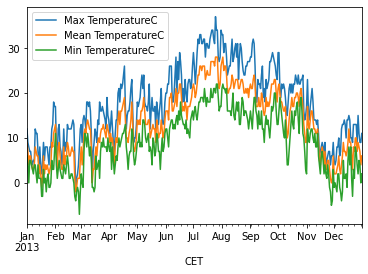

In [115]:
df_TemperatureC.rolling(1, center=True).mean().plot()

<AxesSubplot:xlabel='CET'>

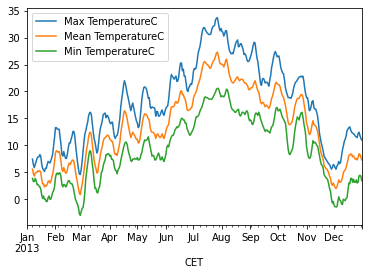

In [116]:
df_TemperatureC.rolling(7).mean().plot()

<AxesSubplot:xlabel='CET'>

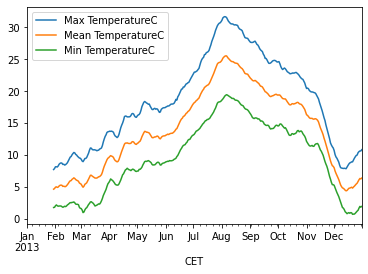

In [117]:
df_TemperatureC.rolling(30).mean().plot()

<AxesSubplot:xlabel='CET'>

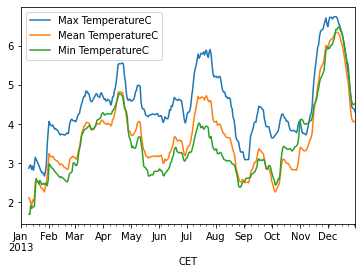

In [118]:
df_TemperatureC.rolling(60, min_periods=10).std().plot()

In [119]:
df_DewPointC=pd.DataFrame(df, columns =["Dew PointC", "MeanDew PointC", "Min DewpointC" ])

<AxesSubplot:xlabel='CET'>

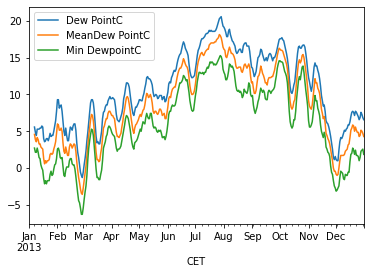

In [120]:
df_DewPointC.rolling(7).mean().plot()

<AxesSubplot:xlabel='CET'>

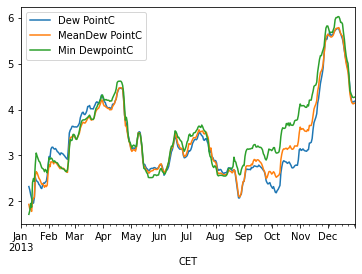

In [121]:
df_DewPointC.rolling(60, min_periods=10).std().plot()

In [122]:
df_Humidity=pd.DataFrame(df, columns =["Max Humidity", "Mean Humidity", "Min Humidity" ])

<AxesSubplot:xlabel='CET'>

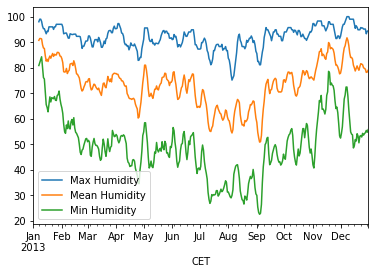

In [123]:
df_Humidity.rolling(7).mean().plot()

<AxesSubplot:xlabel='CET'>

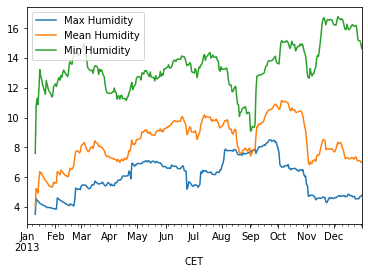

In [124]:
df_Humidity.rolling(60, min_periods=10).std().plot()

다음 각 line의 데이터들 끼리 묶어서 그려보세요. </br>
Sea Level PressurehPa, Mean Sea Level PressurehPa, Min Sea Level PressurehPa </br>
Max VisibilityKm, Mean VisibilityKm, Min VisibilitykM </br>
Max Wind SpeedKm/h, Mean Wind SpeedKm/h</br>
Gust SpeedKm/h</br>
Precipitationmm</br>
CloudCover</br>

In [125]:
df_ThreeFactor=pd.DataFrame(df, columns =["Mean TemperatureC", "MeanDew PointC", "Mean Humidity"]) 

<AxesSubplot:xlabel='CET'>

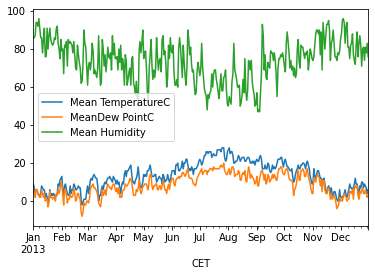

In [126]:
df_ThreeFactor.rolling(1, center=True).mean().plot()

<AxesSubplot:xlabel='CET'>

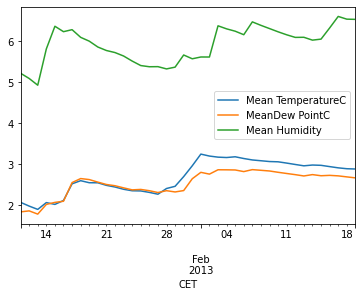

In [127]:
df_ThreeFactor.rolling(60, min_periods=10).std()[10:50].plot()

<AxesSubplot:xlabel='CET'>

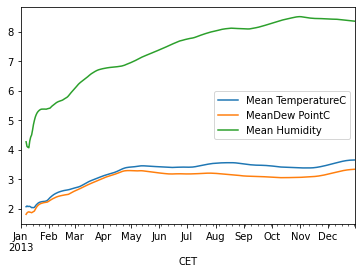

In [128]:
df_ThreeFactor.rolling(60, min_periods=7).std().expanding().mean().plot()

<AxesSubplot:xlabel='CET'>

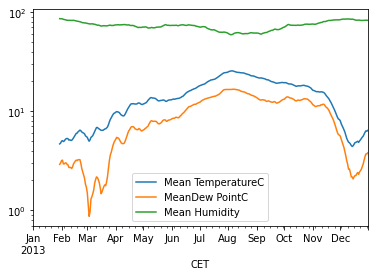

In [129]:
df_ThreeFactor.rolling(30).mean().plot(logy=True)

<AxesSubplot:xlabel='CET'>

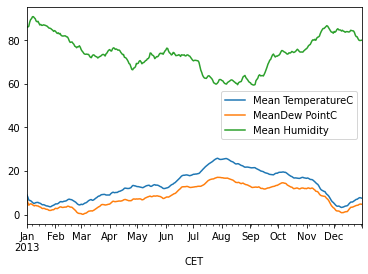

In [130]:
df_ThreeFactor.rolling('20D').mean().plot()

In [131]:
df_ThreeFactor.columns=["MaxTemp", "MeanDew","MeanHumid"]

<AxesSubplot:xlabel='CET'>

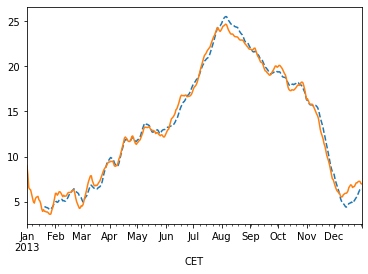

In [132]:
df_ThreeFactor.MaxTemp.rolling(30, min_periods=20).mean().plot(style='--', label='Simple MA')
df_ThreeFactor.MaxTemp.ewm(span=30).mean().plot(style='-', label='EWMA')

<AxesSubplot:xlabel='CET'>

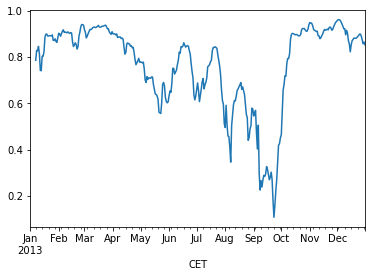

In [133]:
df_ThreeFactor.MaxTemp.rolling(30, min_periods=7).corr(df_ThreeFactor.MeanDew).plot()

<AxesSubplot:xlabel='CET'>

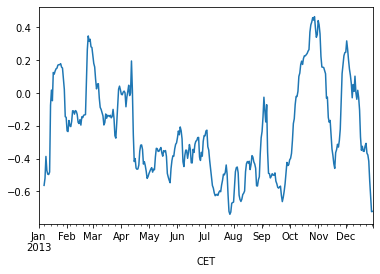

In [134]:
df_ThreeFactor.MaxTemp.rolling(30, min_periods=7).corr(df_ThreeFactor.MeanHumid).plot()

<AxesSubplot:xlabel='CET'>

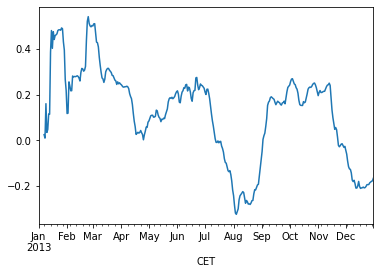

In [135]:
df_ThreeFactor.MeanDew.rolling(100, min_periods=7).corr(df_ThreeFactor.MeanHumid).plot()

## 참고문헌

* 이수안컴퓨터연구소 "Pandas 한번에 제대로 배우기"
* Pandas 사이트: https://pandas.pydata.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly